# Requirements

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the primary objective is to use Long Short-Term Memory (LSTM) networks for time series forecasting in order to predict the current **mean temperature** in the city of Delhi. To accomplish this use data from the past three days, which includes information such as the **mean temperature**, **humidity**, **wind speed**, and **mean pressure**. The goal is to employ LSTM, a type of recurrent neural network, to effectively forecast the future mean temperature based on the provided historical data.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

In [2]:
!gdown 1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC

Downloading...
From: https://drive.google.com/uc?id=1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC
To: /content/climate-data.csv
100% 78.1k/78.1k [00:00<00:00, 101MB/s]


## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [3]:
import pandas as pd
df=pd.read_csv('/content/climate-data.csv')

In [4]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


Explore the dataset using visualizations of your choice.

In [ ]:
# Write your code here. Add as many boxes as you need.

array([[<Axes: title={'center': 'meantemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'wind_speed'}>,
        <Axes: title={'center': 'meanpressure'}>]], dtype=object)

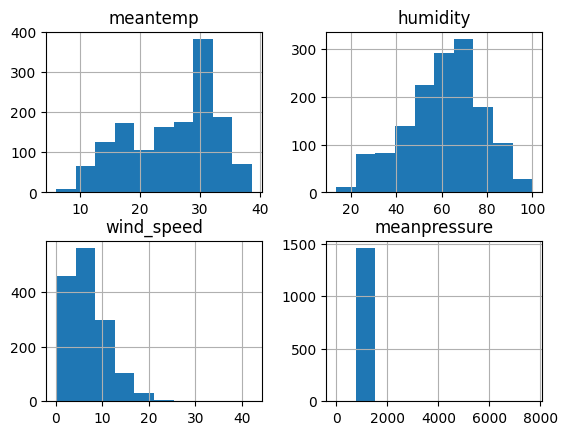

In [5]:
df.hist()

## Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

*Be careful when extracting the features. For each day, ensure that features are obtained sequentially, starting with those from 3 days ago, followed by features from 2 days ago, and finally, features from 1 day ago. This becomes crucial when reshaping the train and test sets later on.*

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [6]:
df.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [7]:
cols=['meantemp', 'humidity', 'wind_speed', 'meanpressure']

In [9]:
df_copy=df.copy()

In [10]:
for i in range(3,0,-1):
  for c in cols:
    df[c+' day_'+str(i)]=df[c].shift(i)

In [11]:
df

,date,meantemp,humidity,wind_speed,meanpressure,meantemp day_3,humidity day_3,wind_speed day_3,meanpressure day_3,meantemp day_2,humidity day_2,wind_speed day_2,meanpressure day_2,meantemp day_1,humidity day_1,wind_speed day_1,meanpressure day_1
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,84.500000,0.000000,1015.666667
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN,NaN,NaN,NaN,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,14.000000,94.300000,9.085000,1014.350000,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762,14.095238,89.666667,6.266667,1017.904762


In [12]:
df=df.dropna(axis=0).reset_index()

In [13]:
df

,index,date,meantemp,humidity,wind_speed,meanpressure,meantemp day_3,humidity day_3,wind_speed day_3,meanpressure day_3,meantemp day_2,humidity day_2,wind_speed day_2,meanpressure day_2,meantemp day_1,humidity day_1,wind_speed day_1,meanpressure day_1
0,3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667
1,4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667
2,5,2013-01-06,7.000000,82.800000,1.480000,1018.000000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000
3,6,2013-01-07,7.000000,78.600000,6.300000,1020.000000,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000
4,7,2013-01-08,8.857143,63.714286,7.142857,1018.714286,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000,7.000000,78.600000,6.300000,1020.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,14.000000,94.300000,9.085000,1014.350000,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000
1455,1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217
1456,1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762
1457,1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762,14.095238,89.666667,6.266667,1017.904762


## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [ ]:
# Write your code here. Add as many boxes as you need.

In [14]:
df.columns

Index(['index', 'date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure',
       'meantemp day_3', 'humidity day_3', 'wind_speed day_3',
       'meanpressure day_3', 'meantemp day_2', 'humidity day_2',
       'wind_speed day_2', 'meanpressure day_2', 'meantemp day_1',
       'humidity day_1', 'wind_speed day_1', 'meanpressure day_1'],
      dtype='object')

In [15]:
fea=[ 'meantemp day_3', 'humidity day_3', 'wind_speed day_3',
       'meanpressure day_3', 'meantemp day_2', 'humidity day_2',
       'wind_speed day_2', 'meanpressure day_2', 'meantemp day_1',
       'humidity day_1', 'wind_speed day_1', 'meanpressure day_1']

In [17]:
X,Y=df[fea],df['meantemp']

In [18]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=False)

## Feauture Scaling
Scale the extracted features using an appropriate scaler.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [23]:
scaler.fit(X_train)

MinMaxScaler()

In [24]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

## Feature Reshaping

Reshape the feature dimensions into the shape `(samples, timesteps, features)`.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [26]:
X_train.shape

(1167, 12)

In [29]:
X_train=X_train.reshape(X_train.shape[0],3,4)
X_test=X_test.reshape(X_test.shape[0],3,4)

In [30]:
X_train.shape

(1167, 3, 4)

## Long Short-Term Memory (LSTM) Network
Build a Long Short-Term Memory (LSTM) Network for forecasting the current **mean temperature** based on the extracted features from the previous three days.

Define the forecasting model using the **Keras Sequential API** (`keras.models.Sequential`), incorporating one or more LSTM layers along with additional relevant layers (`keras.layers`). Be cautious when specifying the configuration of the final layer to ensure proper model output for the forecasting task.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dense, Dropout

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
model = Sequential()
model.add(LSTM(128,  activation='relu', input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True))
model.add(LSTM(64,  activation='relu'))
model.add(Dense(1, activation='linear'))

Compile the previously defined model specifying **loss function** (`keras.losses`), **optimizer** (`keras.optimizers`) and **evaluation metrics** (`keras.metics`).

In [ ]:
# Write your code here. Add as many boxes as you need.

In [36]:
import keras

In [37]:
model.compile(loss=keras.losses.MeanSquaredError() , optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError() ])

Train the model on the training set, specifying the **batch size** and **number of epochs** for the training process. Allocate 20% of the samples for **validation**, and ensure that the dataset remains **unshuffled** during training.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [38]:
history = model.fit(X_train, Y_train.values, epochs=18, batch_size=16,shuffle=False)

Epoch 1/18
73/73 [==============================] - 6s 13ms/step - loss: 414.6763 - mean_squared_error: 414.6763 - mean_absolute_error: 17.3725
Epoch 2/18
73/73 [==============================] - 1s 13ms/step - loss: 128.5726 - mean_squared_error: 128.5726 - mean_absolute_error: 9.2325
Epoch 3/18
73/73 [==============================] - 1s 13ms/step - loss: 20.8248 - mean_squared_error: 20.8248 - mean_absolute_error: 3.5127
Epoch 4/18
73/73 [==============================] - 1s 13ms/step - loss: 9.3529 - mean_squared_error: 9.3529 - mean_absolute_error: 2.3993
Epoch 5/18
73/73 [==============================] - 1s 14ms/step - loss: 8.5161 - mean_squared_error: 8.5161 - mean_absolute_error: 2.2828
Epoch 6/18
73/73 [==============================] - 1s 13ms/step - loss: 8.2406 - mean_squared_error: 8.2406 - mean_absolute_error: 2.2675
Epoch 7/18
73/73 [==============================] - 1s 13ms/step - loss: 8.5759 - mean_squared_error: 8.5759 - mean_absolute_error: 2.3471
Epoch 8/18
73/73

Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

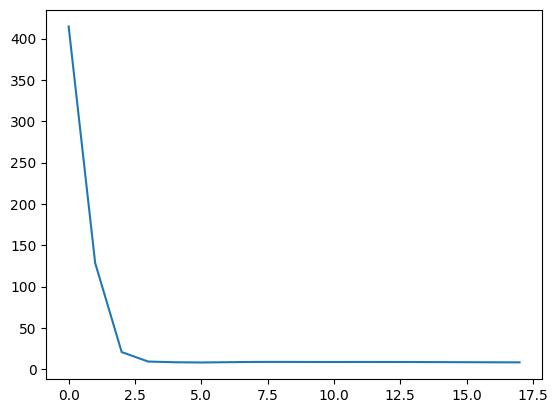

In [42]:
plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['mean_squared_error'], label='val_loss')

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [43]:
y_p1=model.predict(X_test)

10/10 [==============================] - 1s 5ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [45]:
mean_squared_error(y_p1, Y_test), mean_absolute_error(y_p1, Y_test), r2_score(y_p1, Y_test)

(35.55972212416494, 5.350620487191639, 0.24516656047320928)

In [46]:
print(mean_squared_error( Y_test, y_p1), mean_absolute_error( Y_test, y_p1), r2_score( Y_test, y_p1))

35.55972212416494 5.350620487191639 -0.11014761799993189


Create a line plot in order to compare the actual and predicted mean temperatures for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

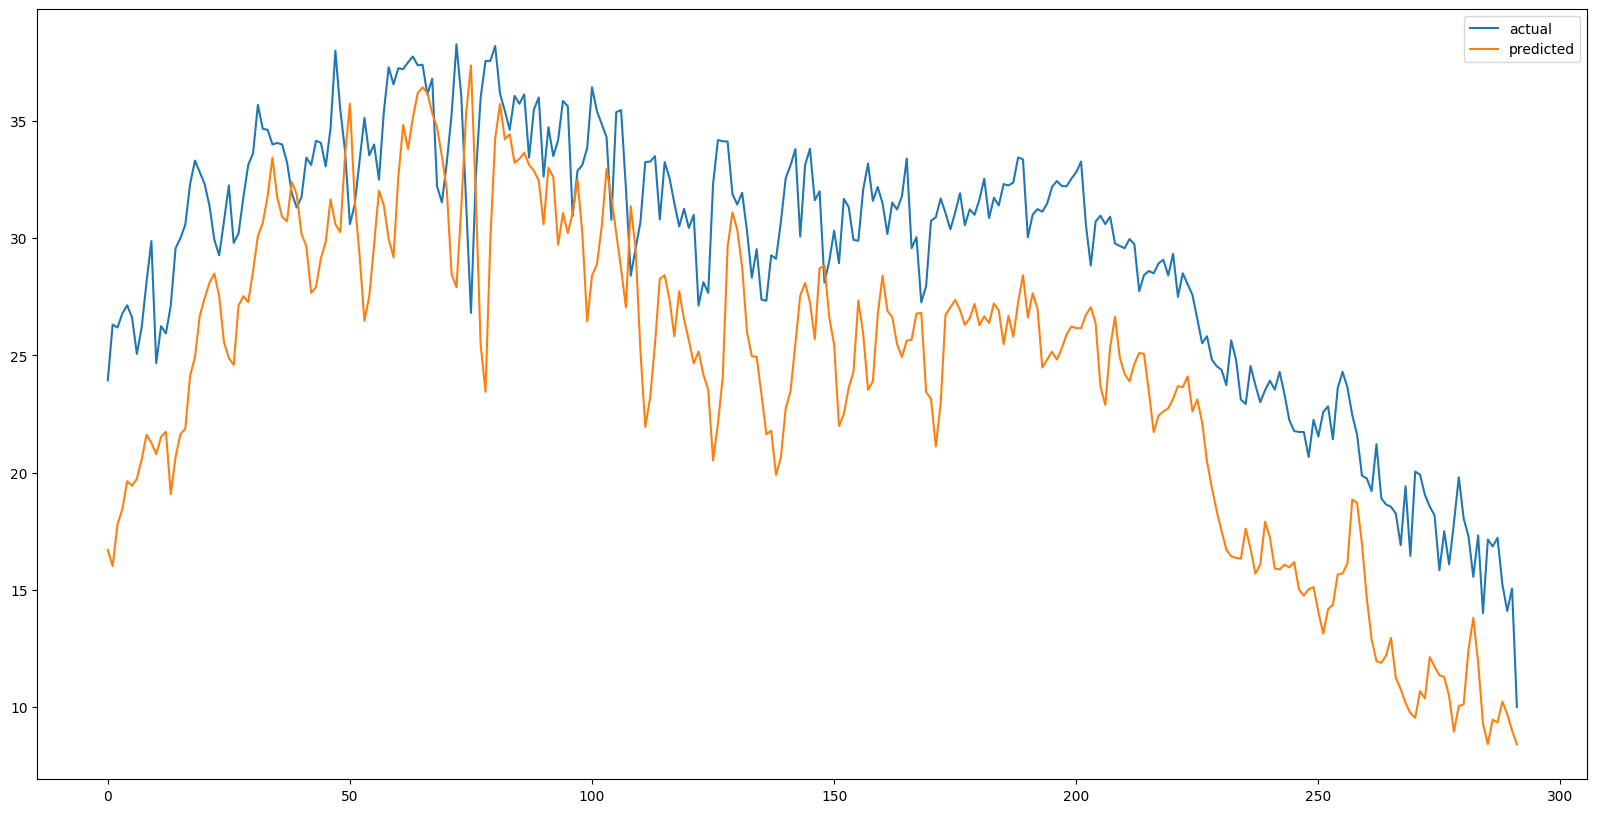

In [47]:
plt.figure(figsize=(20, 10))
plt.plot(Y_test.values, label='actual')
plt.plot(y_p1, label='predicted')
plt.legend()
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to perform a sentiment analysis on a dataset consisting of wine reviews. The dataset contains two attributes: **description** and **points**. The description is a brief text describing the wine and the points which represents a quality metric ranging from 1 to 100. If some wine has at least 90 points it is considered **exceptional**. Your task involves predicting if some wine is exceptional based on its review.

The greater part of the code for the solution is already given. You need to define a tokenizer to tokenize the given texts and a deep neural network model that will be used for the classification task at hand. Fill in only the missing code blocks.

## Requirements

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
import keras
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Downloading the Wine Reviews Dataset

In [2]:
!gdown 1fz9449M9Owofy6CYrKzkGwXKesI32B8u

Downloading...
From: https://drive.google.com/uc?id=1fz9449M9Owofy6CYrKzkGwXKesI32B8u
To: /content/wine-reviews.csv
100% 32.5M/32.5M [00:00<00:00, 93.9MB/s]


## Exploring the Climate Dataset

Load the dataset into a `pandas` data frame.

In [3]:
df = pd.read_csv('wine-reviews.csv')

In [51]:
df.head()

,description,points
0,"Aromas include tropical fruit, broom, brimston...",87
1,"This is ripe and fruity, a wine that is smooth...",87
2,"Tart and snappy, the flavors of lime flesh and...",87
3,"Pineapple rind, lemon pith and orange blossom ...",87
4,"Much like the regular bottling from 2012, this...",87


## Feature Extraction

Extract the feature `exceptional` for each wine review.

In [4]:
df['exceptional'] = df['points'].apply(lambda elem: 1 if elem >= 90 else 0)

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [5]:
X, y = df['description'], df['exceptional']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Text Tokenization

Use tokenizer to convert raw text into a sequence of tokens.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [55]:
df

,description,points,exceptional
0,"Aromas include tropical fruit, broom, brimston...",87,0
1,"This is ripe and fruity, a wine that is smooth...",87,0
2,"Tart and snappy, the flavors of lime flesh and...",87,0
3,"Pineapple rind, lemon pith and orange blossom ...",87,0
4,"Much like the regular bottling from 2012, this...",87,0
...,...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,90,1
129967,Citation is given as much as a decade of bottl...,90,1
129968,Well-drained gravel soil gives this wine its c...,90,1
129969,"A dry style of Pinot Gris, this is crisp with ...",90,1


In [7]:
df['num_words'] = df['description'].apply(lambda x: len(x.split(" ")))

In [57]:
df

,description,points,exceptional,num_words
0,"Aromas include tropical fruit, broom, brimston...",87,0,24
1,"This is ripe and fruity, a wine that is smooth...",87,0,39
2,"Tart and snappy, the flavors of lime flesh and...",87,0,28
3,"Pineapple rind, lemon pith and orange blossom ...",87,0,33
4,"Much like the regular bottling from 2012, this...",87,0,41
...,...,...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,90,1,34
129967,Citation is given as much as a decade of bottl...,90,1,38
129968,Well-drained gravel soil gives this wine its c...,90,1,43
129969,"A dry style of Pinot Gris, this is crisp with ...",90,1,40


<Axes: ylabel='Frequency'>

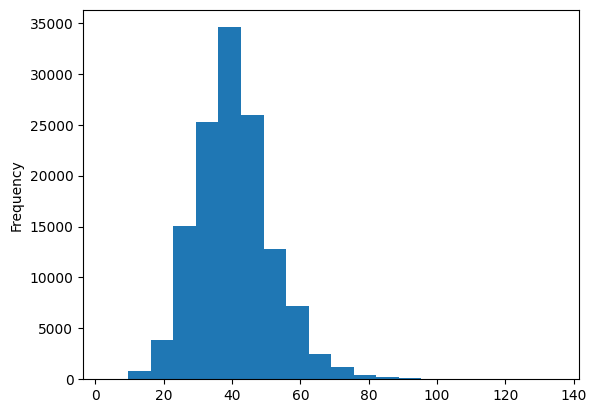

In [61]:
df['num_words'].plot.hist(bins=20)

In [8]:
max_tokens=55

In [9]:
tokenizer = Tokenizer(num_words=max_tokens)
tokenizer.fit_on_texts(X_train.values)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

## Padding
Pad each sequence to maximum length of 16.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [10]:
len_tokens = [len(token_list) for token_list in X_train]

(array([7.1400e+02, 1.2406e+04, 4.0251e+04, 3.5870e+04, 1.2271e+04,
        2.1200e+03, 2.8300e+02, 4.7000e+01, 1.0000e+01, 4.0000e+00]),
 array([ 1. ,  7.1, 13.2, 19.3, 25.4, 31.5, 37.6, 43.7, 49.8, 55.9, 62. ]),
 <BarContainer object of 10 artists>)

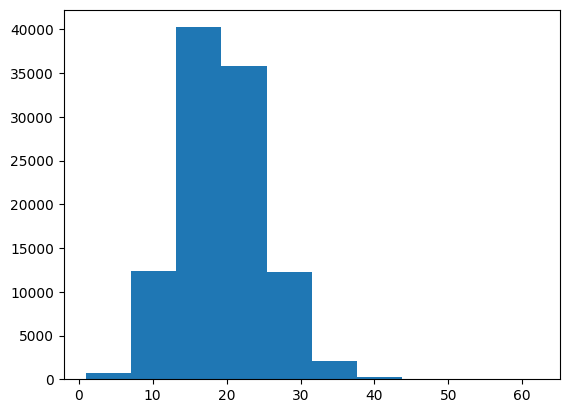

In [67]:
plt.hist(len_tokens)

## Deep Neural Network

Define Deep Neural Network model to predict if a specific wine is exceptional or not based on the tokenized and padded wine reviews.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [30]:
model = Sequential()
model.add(Embedding(max_tokens, 32, input_length=pd.DataFrame(X_train).shape[1]  ))

#model.add(Embedding(max_tokens, 32, input_length=len(X_train)))

model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

Compile the previously defined model specifying loss function, optimizer and evaluation metrics.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [31]:
model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

Fit the compiled model on the train set specifying the percent for validation, batch_size, and number of epochs.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [13]:
import numpy as np
import torch

In [86]:
df.columns

Index(['description', 'points', 'exceptional', 'num_words'], dtype='object')

In [34]:
y_train.shape

(103976,)

In [28]:
pd.DataFrame(X_train).shape

(103976, 62)

In [35]:
from keras.utils import to_categorical

In [36]:
history = model.fit(pd.DataFrame(X_train), to_categorical(y_train), validation_split=0.2, batch_size=10, epochs=15)

Epoch 1/15


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

In [22]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.show()

NameError: name 'history' is not defined

Use the trained model to make predictions for the test set.

In [74]:
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/data_adapter.py:714: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asarray(x)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
print(classification_report(y_test, np.round(y_pred)))